In [7]:
import  numpy as np 
import  matplotlib.pyplot as plt
import  control as ctrl
from    numpy.linalg import inv
import  pandas as pd

# First Order Trasfer Function Model Analysis 

$$
 P(z) = \frac{b}{z-a}\quad\Longrightarrow\quad y_k+a*y_{k-1}=b*u_{k-1} 
$$

$$
\begin{align*}
y'_k = [-y_{k-1} \quad u_{k-1}] * \begin{bmatrix} a \\ \quad \\ b \end{bmatrix}
\end{align*}
$$

[[-0.    1.24  1.  ]
 [-0.    1.08  1.  ]
 [-0.04  1.16  1.  ]
 ...
 [-3.12  4.36  1.  ]
 [-3.08  4.28  1.  ]
 [-3.12  4.44  1.  ]]
[[ 0.00807839  0.00800129 -0.00861081]
 [ 0.00800129  0.00796538 -0.00864002]
 [-0.00861081 -0.00864002  0.00958504]]
[-51966.3728  70227.4192  16613.8   ]
[-0.95289509  0.04663624 -0.0498488 ]


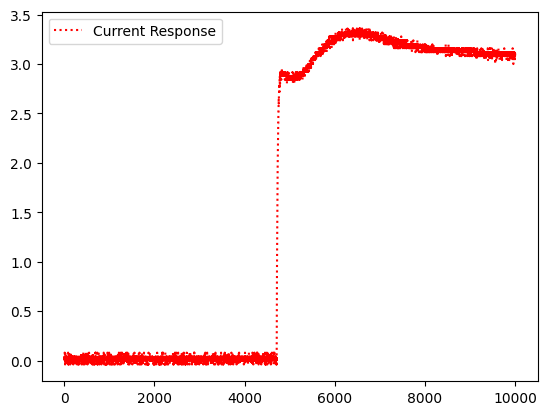

<TransferFunction>: sys[12]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = 1

   0.04664
  ----------
  z - 0.9529


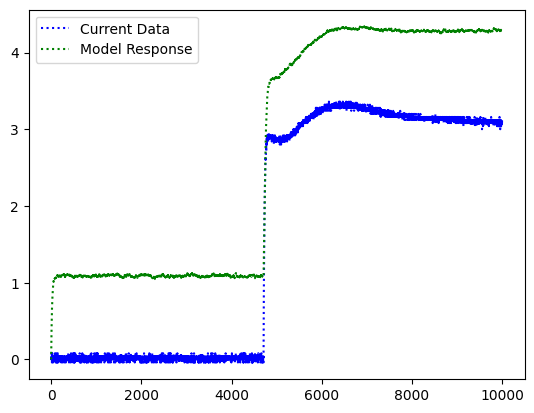

11291.80538017654


In [17]:
df          =   pd.read_csv("/home/mgph/Desktop/?/MAESTRIA/HYDROGEN_PROJ/Analysis_Data/step-response-analysis/step-response-analysis/Stp_Resp_20251220_A00.csv", encoding="latin1")
yk_Ic       =   df.iloc[:,2]    #   Values of the current
uk_Vstep    =   df.iloc[:,1]    #   Values of the input step 
uk_Velec    =   df.iloc[:,5]    #   Values of the electrodes voltages
ck          =   np.ones(len(yk_Ic))   # ones vector 

u_k         =   uk_Velec    # Define which step entrance

phi         =   np.c_[-yk_Ic[:-1], u_k[:-1], ck[:-1]]
print(phi)

#Define the first order model P(z) = b/(z-a)

arg_1   =   inv(phi.T.dot(phi))
print(arg_1)
arg_2   =   phi.T.dot(yk_Ic[1:])
print(arg_2)
thetaH  =   arg_1.dot(arg_2)
print(thetaH)
plt.plot(yk_Ic, ':r', label="Current Response")
plt.legend()
plt.show()

# Creat the transfer function 
num =   [thetaH[1]]
den =   [1, thetaH[0]]
Ts  =   1

Pz  =   ctrl.TransferFunction(num, den, Ts)
print(Pz)

#Simulate model response

t   =   np.arange(len(u_k))*Ts
t_out, y_model  =   ctrl.forced_response(Pz, T=t, U=u_k)
plt.plot(t, yk_Ic, ':b', label="Current Data")
plt.plot(t_out, y_model, ':g', label='Model Response')
plt.legend()
plt.show()

#Error Calculate 
Error   =   (yk_Ic -y_model).T.dot(yk_Ic-y_model)
print(Error)

# Second Order Transfer Function Analysis 

10000
[[ 0.08451332 -0.08431984 -0.00022256  0.0003645 ]
 [-0.08431984  0.08447107  0.0003396  -0.00024069]
 [-0.00022256  0.0003396   0.00933068 -0.00924486]
 [ 0.0003645  -0.00024069 -0.00924486  0.00933728]]
[-51966.3728 -51961.2464  70227.4192  70221.48  ]
[-5.21011244e-01 -4.77542893e-01  1.41619175e-03 -2.89615104e-04]


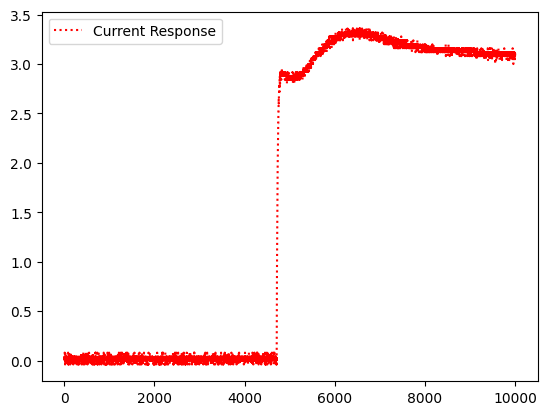

<TransferFunction>: sys[14]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = 1

        0.001416 z - 0.0002896
  -----------------------------------
  z^3 - 0.521 z^2 - 0.4775 z + 0.0003


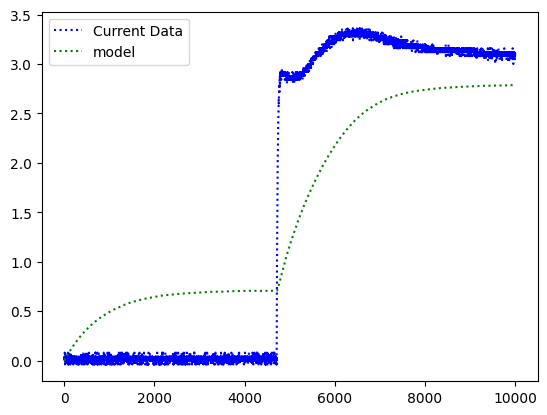

5619.780816751438


In [18]:
phi_scnd    =   np.zeros((len(yk_Ic),4))

for i in range(1, len(yk_Ic)):
    for j in range(4):
        if  j   ==  0:
            if (i-1)    <   0:
                phi_scnd[i][j]  =   0
            else:
                phi_scnd[i][j]  =   -yk_Ic[i-1]
        if  j   ==  1:
            if  (i-2)   <   0:
                phi_scnd[i][j]  =   0
            else:
                phi_scnd[i][j]  =   -yk_Ic[i-2]
        if  j   ==  2:
            if (i-1)    <   0:
                phi_scnd[i][j]  =   0
            else:
                phi_scnd[i][j]  =   u_k[i-1]
        if  j   ==  3:
            if  (i-2)   <   0:
                phi_scnd[i][j]  =   0
            else:
                phi_scnd[i][j]  =   u_k[i-2]

print(len(phi_scnd))

# Define the first argument of the formula 
arg_A   =   inv(phi_scnd[1:].T.dot(phi_scnd[1:]))
print(arg_A)
arg_B   =   phi_scnd[1:].T.dot(yk_Ic[1:])
print(arg_B)
theta_H =   arg_A.dot(arg_B)
print(theta_H)
plt.plot(yk_Ic, ':r', label="Current Response")
plt.legend()
plt.show()

#Force entrance for the comparative between the real data and model response
k       =   0.0003
num_1   =   [theta_H[2], theta_H[3]]
den_1   =   [1, theta_H[0], theta_H[1], k]
Ts      =   1   #time Sampling

Pz_1    =   ctrl.TransferFunction(num_1, den_1, Ts)
print(Pz_1)

t                   =   np.arange(len(u_k))*Ts
t_out_1, y_model_1  =   ctrl.forced_response(Pz_1, T=t, U=u_k)
plt.plot(t, yk_Ic, ':b', label="Current Data")
plt.plot(t_out_1, y_model_1, ':g', label="model")
plt.legend()
plt.show()

#Error
Error   =   (yk_Ic-y_model_1).T.dot(yk_Ic-y_model_1)
print(Error)
